## What is the true normal human body temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. In 1992, this value was revised to 36.8$^{\circ}$C or 98.2$^{\circ}$F. 

#### Exercise
In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.

Answer the following questions **in this notebook below and submit to your Github account**. 

1.  Is the distribution of body temperatures normal? 
    - Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply. 
2.  Is the true population mean really 98.6 degrees F?
    - Bring out the one sample hypothesis test! In this situation, is it approriate to apply a z-test or a t-test? How will the result be different?
3.  At what temperature should we consider someone's temperature to be "abnormal"?
    - Start by computing the margin of error and confidence interval.
4.  Is there a significant difference between males and females in normal temperature?
    - Set up and solve for a two sample hypothesis testing.

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/human_body_temperature.csv')

---
### 1.  Is the distribution of body temperatures normal? 

A histogram of the temperatures indicates a roughly normal distribution:

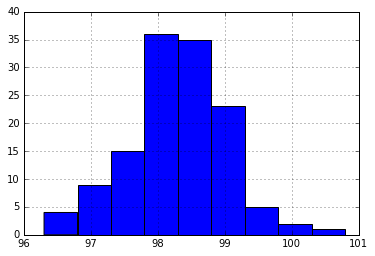

In [3]:
%matplotlib inline
df.temperature.hist(bins = 9)
None

A more formal test of normality gives a large *p*-value, which indicates no evidence against temperatures having a normal distribution:

In [4]:
import scipy.stats as stats
stats.normaltest(df.temperature)

NormaltestResult(statistic=2.7038014333192031, pvalue=0.2587479863488254)

Regardless, normality of the temperatures is ***not*** a "condition for the CLT." Quite the opposite! The Central Limit Theorem actually makes normality of the temperatures fairly unimportant when using a sample of this size:

In [5]:
n = len(df.temperature)
n

130

### 2.  Is the true population mean really 98.6 degrees F?

A *t*-test, with null hypothesis $\mu=98.6$, would be the appropriate tool here, since we do not know the population standard deviation $\sigma$. The result is a very small *p*-value, and a negative test statistic, indicating strong evidence that the true population mean is actually **below** 98.6 degrees F.

In [6]:
stats.ttest_1samp(df.temperature, 98.6)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

### 3.  At what temperature should we consider someone's temperature to be "abnormal"?

Here is the (95% confidence) margin of error:

In [7]:
E = stats.t.ppf(0.975, n-1) * df.temperature.sem()
E

0.12722786362273047

Here is the 95% confidence interval for mean temperature:

In [8]:
(df.temperature.mean() - E, df.temperature.mean() + E)

(98.122002905608042, 98.376458632853513)

So we can be confident that a temperature above 98.38 degrees F would be above the mean.

### 4.  Is there a significant difference between males and females in normal temperature?

Using a *t*-test for two means with independent samples (null hypothesis: the population means are equal), the *p*-value is fairly low, giving some evidence that there **is** a difference between males and females in normal temperature.

In [9]:
males = df[df.gender == 'M'].temperature
females = df[df.gender == 'F'].temperature
stats.ttest_ind(males, females, equal_var=False)

Ttest_indResult(statistic=-2.2854345381656112, pvalue=0.023938264182934196)